In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 

# Importing Data

In [2]:
crop = pd.read_csv("crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Ask Six Question to yourself

In [3]:
crop.shape

(2200, 8)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crop.duplicated().sum()

0

In [7]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# label_encoder = preprocessing.LabelEncoder()
# crop['label'] = label_encoder.fit_transform(crop['label'])
# crop

# Exploring Data

In [9]:
# corr = crop.corr()
# corr

In [10]:
import seaborn as sns
# sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [11]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

C:\Users\amits\AppData\Local\Temp\ipykernel_8876\396239346.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


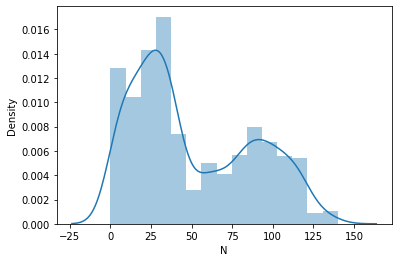

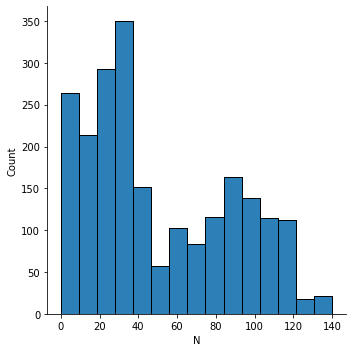

In [12]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
sns.displot(crop['N'])
sns.histplot(crop['N'])
plt.show()

# Encoding

In [13]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [14]:
crop['crop_num'].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [15]:
# crop.drop(['label'],axis=1,inplace=True)
crop.sample(5)


,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
2025,76,56,39,24.394595,89.891065,6.551130,197.122005,jute,3
427,9,66,21,30.118121,34.133078,5.719890,157.085823,pigeonpeas,19
1934,131,52,16,23.657241,84.476015,6.486068,88.544791,cotton,4
511,38,56,25,25.740953,45.384971,7.881186,67.434882,mothbeans,18
1235,32,129,201,16.362519,83.004716,6.487546,71.556655,grapes,11


# Train Test Split

In [16]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [17]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [18]:
X.shape

(2200, 7)

In [19]:
y.shape

(2200,)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(1760, 7)

In [23]:
X_test.shape

(440, 7)

In [24]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430



# Scale the features using MinMaxScaler

In [25]:
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()

# X_train = ms.fit_transform(X_train)
# X_test = ms.transform(X_test)

In [26]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


# Standarization

In [27]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()


# sc.fit(X_train)
# X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)

In [28]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


# Training Models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  with accuracy : 0.9454545454545454
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9613636363636363
K-Nearest Neighbors  with accuracy : 0.9704545454545455
Decision Tree  with accuracy : 0.9818181818181818
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.990909090909091
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.9045454545454545


In [30]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
print(X_test)
accuracy_score(y_test,ypred)

        N    P    K  temperature   humidity        ph    rainfall
1451  101   17   47    29.494014  94.729813  6.185053   26.308209
1334   98    8   51    26.179346  86.522581  6.259336   49.430510
1761   59   62   49    43.360515  93.351916  6.941497  114.778071
1735   44   60   55    34.280461  90.555616  6.825371   98.540477
1576   30  137  200    22.914300  90.704756  5.603413  118.604465
...   ...  ...  ...          ...        ...       ...         ...
59     99   55   35    21.723831  80.238990  6.501698  277.962619
71     67   45   38    22.727910  82.170688  7.300411  260.887506
1908  121   47   16    23.605640  79.295731  7.723240   72.498009
1958  116   52   19    22.942767  75.371706  6.114526   67.080226
482     5   68   20    19.043805  33.106951  6.121667  155.370562

[440 rows x 7 columns]


0.9931818181818182

# Predictive System

In [31]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    # transformed_features = ms.fit_transform(features)
    # transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(features).reshape(1,-1)
    print(prediction)
    return prediction[0] 

In [32]:

def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
    print(features)
    # transformed_features1 = ms.transform(features)
    # transformed_features = sc.fit_transform(features)
    # print(transformed_features)
    prediction = rfc.predict(features).reshape(1,-1)
    print(prediction)
    return prediction[0] 

N , P , K , temperature , humidity , ph , rainfall = 67,   45,   38,    22.727910,  82.170688,  7.300411,  260.887506
predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[[ 67.        45.        38.        22.72791   82.170688   7.300411
  260.887506]]
[[1]]
Rice is the best crop to be cultivated 


c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
# pickle.dump(ms,open('minmaxscaler.pkl','wb'))
# pickle.dump(sc,open('standscaler.pkl','wb'))